#BD분석실습 **기말평가(100점)**



```
# 코드로 형식 지정됨
```

* 이름: 정철웅
* 학과&학번: 컴퓨터공학부_201858124

#####1) 제출방법: LMS 과제란 '기말평가'
#####2) 제출형식: .ipynb 파일
#####3) 제출기한: 12월 17일(일요일) 23:59(**엄수**)

### **[과제내용]**
**[미션]**
* 제공된 데이터(text_data)를 활용하여 토픽모델을 수행하시오.

**[수행할 과제 내용]**
  * 수행과제1. 데이터 가져오기(구글드라이브에서 가져오기)
  * 수행과제2. 데이터 전처리(전처리 방법 자유)
  * 수행과제3. 텍스트 분석(데이터 탐색)-선택(의무사항 아님)
  * 수행과제4. 토픽모델링
  * 수행과제5. 모델평가
  * 수행과제6. 모델수정
  * 수행과제7. 결과정리 및 분석


---------------------------



#1.라이브러리 & 데이터

###**------------------------**

In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 121666 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
!pip install konlpy
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 46.6 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np

from collections import Counter
from konlpy.tag import Kkma
from wordcloud import WordCloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive/


In [ ]:
file_path = '/content/drive/My Drive/News.csv'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.read_csv(file_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(df)

          date                                               text
0     20231211  최근 주목을 받는 인공지능(AI) 산업에서도 한국인 개발자들이 곳곳에서 활약하고 있...
1     20231211  미국 빅테크(정보기술 산업의 지배적인 기업)의 인공지능(AI) 경쟁이 심화하는 가운...
2     20231210  ‘겨울이 오고 있다(Winter is Coming).’ 스타트업 생태계를 잘 표현하...
3     20231210  구글이 최근 공개한 차세대 인공지능(AI) 거대언어모델(LLM)인 제미나이(Gemi...
4     20231210  전 세계 인공지능(AI) 개발을 주도하고 있는 마이크로소프트(MS)와 챗GPT 개발...
...        ...                                                ...
2254  20230126  2016년 3월 알파고와 이세돌 9단의 5번기는 인공지능(AI)이라는 단어를 전 세...
2255  20230126  ‘챗GPT’ 바람을 계기로 국내 기업들도 초거대 인공지능(AI) 개발에 속도를 내고...
2256  20230125  지난해 12월 태어난 인공지능(AI)에 세상 모든 개발자의 관심이 집중됐습니다. 인...
2257  20230117  인공지능 챗봇 시장 ‘게임체인저’ \n양자컴퓨팅 특허 내는 법 설명 등\n‘분야 불...
2258  20230117  이 기사는 국내 최대 해외 투자정보 플랫폼 한경 글로벌마켓에 게재된 기사입니다. \...

[2259 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 2.데이터 전처리

###**-----------------------**

In [ ]:
import re

def regular_expression(text):          # 정규표현식 적용
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]')    # 한글의 정규표현식을 리턴(한글과 띄어쓰기를 제외한 모든 글자)
    result = hangul.sub('', text)            # 한글과 띄어쓰기를 제외한 모든 부분 제거
    return result

In [ ]:
df1 = df
df1['text'][0]

'최근 주목을 받는 인공지능(AI) 산업에서도 한국인 개발자들이 곳곳에서 활약하고 있다. 세계에서 AI 기술과 서비스 수준이 가장 높은 미국에서도 한국인 AI 개발자를 찾을 수 있다. 미국의 유망 AI 스타트업 투게더AI에서 근무하는 정희진 씨도 그런 개발자 중의 하나다. 투게더AI는 AI 기업인 고객사의 AI 모델 구축과 운영 등을 돕는다. 최근 시리즈..'

In [ ]:
from konlpy.tag import Okt
from collections import Counter

nouns_tagger = Okt()


['최근', '주목', '인공', '지능', '산업', '한국인', '개발자', '곳곳', '활약', '세계', '기술', '서비스', '수준', '가장', '미국', '한국인', '개발자', '수', '미국', '유망', '스타트업', '투게더', '근무', '정희진', '씨', '개발자', '중', '하나', '투게더', '기업인', '고객', '사의', '모델', '구축', '운영', '등', '최근', '시리즈']


In [ ]:
words = nouns_tagger.nouns(regular_expression("".join(df1['text'].tolist())))

counter = Counter(words)
counter.most_common(10)

[('지능', 1656),
 ('인공', 1606),
 ('챗', 1317),
 ('일', 1061),
 ('생', 851),
 ('등', 839),
 ('오픈', 728),
 ('것', 691),
 ('기업', 666),
 ('기사', 657)]

In [ ]:
word1 = Counter({x : counter[x] for x in counter if len(x) > 1}) #단어 길이가 1 이상만 출력
word1.most_common(10)

[('지능', 1656),
 ('인공', 1606),
 ('오픈', 728),
 ('기업', 666),
 ('기사', 657),
 ('시간', 618),
 ('기술', 609),
 ('미국', 599),
 ('서비스', 580),
 ('개발', 570)]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer     #sklearn 사용
from konlpy.tag import Okt      #형태소 분석
twit = Okt()

stop_words=["지난번", "창의성", "ㅋ", "^^", "대해", "대하", "중에서", "000원", "판매", "가격", "그", "등", "이로", "저희", "있는", "기반으로", "이승헌", "뇌교육의", "위한",
            "있다", "통해", "뇌를", "우리", "BR뇌교육", "대한", "엘살바도르",
           "안녕하세요", "하는", "com", "하고", "IBREA","많이"]

def tokenizer(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]')     #정규식
    result = hangul.sub('', text)
    tagger = Okt()
    word1 = nouns_tagger.nouns(result)    #명사 추출
    word1 = [x for x in words if len(x) > 1]
    word1 = [x for x in words if x not in stop_words]
    return word1

#벡터화
vect = CountVectorizer(tokenizer = tokenizer)             #, max_df = 0.5, min_df = 5, #max_features = 100)
bow_vect = vect.fit_transform(df1['text'].tolist())

word_list = vect.get_feature_names_out()
count_list = bow_vect.toarray().sum(axis=0)

print(bow_vect.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(2259, 8321)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer     #sklearn 사용
from konlpy.tag import Okt      #형태소 분석
twit = Okt()

stop_words_file = "/content/sample_data/korean.txt"           # 불용어 처리 파일 사용
with open(stop_words_file, 'r', encoding='utf-8') as file:
    stop_words = [line.strip() for line in file.readlines()]

def tokenizer(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]')     #정규식
    result = hangul.sub('', text)
    tagger = Okt()
    word1 = nouns_tagger.nouns(result)        #명사 추출
    word1 = [x for x in words if len(x) > 1]
    word1 = [x for x in words if x not in stop_words_file]      #파일로도 불용어 처리가 가능
                                                                #하다는 것을 보여 드리고 싶었습니다.
    return word1


vect = CountVectorizer(tokenizer = tokenizer)             #, max_df = 0.5, min_df = 5, #max_features = 100)
bow_vect = vect.fit_transform(df1['text'].tolist())

word_list = vect.get_feature_names_out()
count_list = bow_vect.toarray().sum(axis=0)

print(bow_vect.shape)

(2259, 8334)


**------------------------------------------------------------------**

# 3.토픽 모델링

In [ ]:
from collections.abc import Mapping
from collections.abc import MutableMapping
from collections.abc import Sequence

In [ ]:
#!pip install gensim==3.6.0
!pip install gensim
from gensim import corpora, models
from gensim import corpora
import gensim

kkma = Kkma()

# 형태소 분석
df2=[]
for i in range(len(df1)):
    try:
        df2.append(kkma.nouns(df1["text"][i]))      #꼬꼬마 분석기 사용
    except Exception as e:
        continue
#df2[1:2]

df2=[[y for y in x if len(y) > 1]
     for x in df2]

dictionary = corpora.Dictionary(df2)                 # dictionary 생성(토큰화 결과 + id(gensim 내부) 결합)
corpus = [dictionary.doc2bow(text) for text in df2]  # doc2bow:count Vectorizer 기능(사이킷런) 변환

print('#Number of unique token: %d' % len(dictionary))
print('#Number of documents: %d' % len(corpus))


#Number of unique token: 12353
#Number of documents: 2259


In [ ]:
import matplotlib.pyplot as plt

from gensim.models import LdaModel

num_topics = 10
passes = 5
model = LdaModel(corpus = corpus, num_topics=num_topics , id2word = dictionary, passes = passes, random_state = 7)

model.print_topics(num_words = 5)

[(0, '0.016*"삼성전자" + 0.015*"전자" + 0.015*"삼성" + 0.006*"반도체" + 0.006*"스마트폰"'),
 (1, '0.011*"무라티" + 0.010*"책임자" + 0.009*"미라" + 0.008*"최고기술책임자" + 0.006*"주가"'),
 (2, '0.007*"미국" + 0.006*"대답" + 0.006*"금리" + 0.005*"서울" + 0.005*"시간"'),
 (3, '0.009*"지난해" + 0.008*"대비" + 0.007*"전년" + 0.007*"감소" + 0.006*"이익"'),
 (4, '0.017*"인공지능" + 0.017*"인공" + 0.016*"지능" + 0.011*"스타트" + 0.011*"스타트업"'),
 (5, '0.026*"인공" + 0.026*"지능" + 0.026*"인공지능" + 0.014*"시간" + 0.014*"현지"'),
 (6, '0.008*"인공지능" + 0.008*"인공" + 0.008*"지능" + 0.005*"최근" + 0.005*"기억"'),
 (7, '0.024*"지능" + 0.024*"인공지능" + 0.024*"인공" + 0.013*"기술" + 0.010*"서비스"'),
 (8, '0.011*"지능" + 0.011*"인공" + 0.011*"인공지능" + 0.007*"질문" + 0.007*"대학"'),
 (9, '0.015*"반도체" + 0.010*"삼성" + 0.008*"전자" + 0.008*"증시" + 0.008*"주가"')]

In [ ]:
!pip install pyLDAvis==3.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135594 sha256=15bced9381891866690132487c33de76fb1093abb44f5c2f33dff67def78370d
  Stored in directory: /root/.cache/pip/wheels/20/a4/75/e8ae5c16ebb85de43dfa0f238db03b19592fa4b3063882bb14
Successfully built pyLDAvis


In [ ]:
import pyLDAvis
import pyLDAvis.gensim

# LDA 모델을 pyLDAvis 객체에 전달
pyLDAvis.enable_notebook()
lda_viz = pyLDAvis.gensim.prepare(model, corpus, dictionary)
lda_viz

/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.233979 -0.037368       1        1  42.007218
7      0.194589  0.016492       2        1  16.721816
4      0.147858  0.032251       3        1  15.367744
9     -0.074983 -0.227864       4        1   5.892401
3     -0.056324 -0.041945       5        1   4.483124
0     -0.101439  0.012131       6        1   3.812351
2     -0.086425 -0.014251       7        1   3.719127
6     -0.071862  0.067437       8        1   3.391228
8     -0.040329  0.135355       9        1   3.254585
1     -0.145065  0.057761      10        1   1.350406, topic_info=     Term        Freq       Total Category  logprob  loglift
224    기사  278.000000  278.000000  Default  30.0000  30.0000
218    게재  267.000000  267.000000  Default  29.0000  29.0000
253   반도체  179.000000  179.000000  Default  28.0000  28.0000
897    전자  119.000000  119.000000  Default  27.0000  27.0000
887    삼성  119.000000  119.000000  Default  26.0000  26.0000
...   ...         ...         ...      ...      ...      ...
92     조정    3.172975   15.146457  Topic10  -5.8313   2.7417
241   플랫폼    3.658346  333.447756  Topic10  -5.6890  -0.2077
1544   오전    3.266979   31.693430  Topic10  -5.8021   2.0325
918    이유    3.198720   45.689320  Topic10  -5.8233   1.6457
39     기준    3.170315   44.020438  Topic10  -5.8322   1.6739

[670 rows x 6 columns], token_table=       Topic      Freq Term
term                       
30         1  0.282634   10
30         2  0.223478   10
30         3  0.203759   10
30         4  0.144603   10
30         5  0.065729   10
...      ...       ...  ...
317        9  0.034449   회사
1073       2  0.929899  획기적
10498      9  0.896212   후기
12200      2  0.934600   후안
5255       5  0.873767   흑자

[1389 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 8, 5, 10, 4, 1, 3, 7, 9, 2])

###**-----------------------**

# 4.모델평가

In [ ]:
import matplotlib.pyplot as plt

from gensim.models import CoherenceModel
cm = CoherenceModel(model=model, texts=df2, coherence='u_mass', topn=10, dictionary=dictionary)
coherence = cm.get_coherence()
print(coherence)

-4.055806864663885


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values = []
for i in range(2, 15):  # 2에서 14까지 반복하는 루프
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary, random_state=i)  # 'i'개의 토픽을 갖는 LDA 모델 생성

    cm = CoherenceModel(model=ldamodel, texts=df2, coherence='u_mass', topn=i, dictionary=dictionary)
    #  CoherenceModel 인스턴스 생성

    coherence = cm.get_coherence()  # 일관성 계산
    coherence_values.append(coherence)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **coherence_values 값이 높으면 좋음(일관성 수준이 높음)**




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


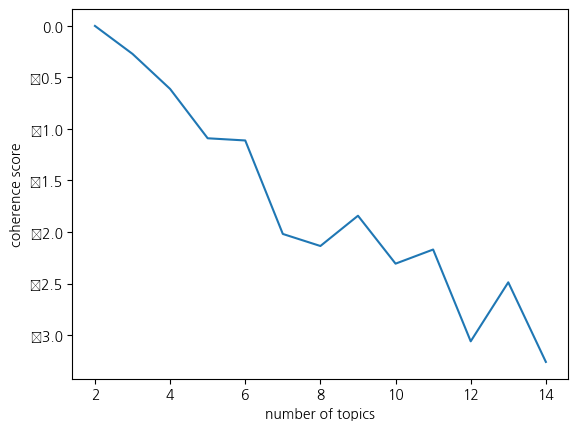

In [ ]:
x=range(2,15)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


num_topics: 6, perplexity: -8.413, coherence: -3.011


num_topics: 7, perplexity: -8.503, coherence: -4.238


num_topics: 8, perplexity: -8.637, coherence: -5.451


num_topics: 9, perplexity: -8.796, coherence: -6.569


num_topics: 10, perplexity: -8.981, coherence: -7.284


num_topics: 11, perplexity: -9.169, coherence: -6.692


num_topics: 12, perplexity: -9.322, coherence: -6.748


num_topics: 13, perplexity: -9.459, coherence: -6.721


num_topics: 14, perplexity: -9.573, coherence: -6.947
num_topics: 15, perplexity: -9.686, coherence: -7.689


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


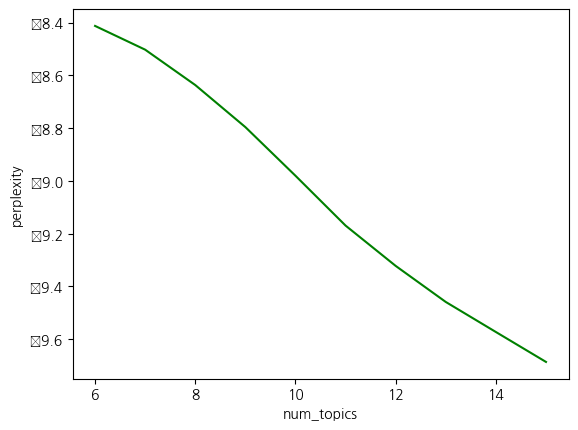

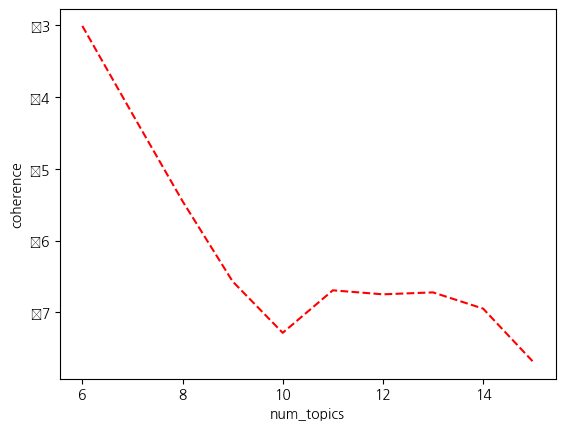

In [ ]:
def show_coherence(corpus, dictionary, start=6, end=15):
  #변수 초기화
    iter_num = []
    per_value = []
    coh_value = []

    for i in range(start, end + 1):
        model = LdaModel(corpus=corpus, id2word=dictionary, chunksize=1000, num_topics=i, random_state=7)
        iter_num.append(i) #토픽 개수 저장


        pv = model.log_perplexity(corpus)
        per_value.append(pv)

        #일관성 계산
        cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')

    #시각화
    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel('num_topics')
    plt.ylabel('perplexity')
    plt.show()

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel('num_topics')
    plt.ylabel('coherence')
    plt.show()

show_coherence(corpus, dictionary, start=6, end=15)

# **10이 적당한 num_topic**

###**-----------------------**

#5. 모델수정

In [ ]:
model=gensim.models.ldamodel.LdaModel(corpus, num_topics=10,
                                         id2word=dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model.print_topics(num_words=5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, '0.014*"지능" + 0.013*"인공" + 0.012*"인공지능" + 0.008*"기술" + 0.007*"기업"'),
 (1, '0.007*"지능" + 0.007*"미국" + 0.007*"인공지능" + 0.007*"마켓" + 0.006*"최대"'),
 (2, '0.013*"인공지능" + 0.013*"인공" + 0.012*"지능" + 0.009*"반도체" + 0.007*"하이닉스"'),
 (3, '0.016*"인공지능" + 0.016*"지능" + 0.015*"인공" + 0.009*"생성" + 0.008*"기술"'),
 (4, '0.007*"구글" + 0.007*"소프트" + 0.007*"인공지능" + 0.007*"지능" + 0.006*"마이크로소프트"'),
 (5, '0.018*"지능" + 0.018*"인공" + 0.018*"인공지능" + 0.014*"기술" + 0.006*"기업"'),
 (6, '0.024*"인공" + 0.023*"인공지능" + 0.022*"지능" + 0.010*"미국" + 0.008*"챗봇"'),
 (7, '0.028*"인공" + 0.027*"인공지능" + 0.027*"지능" + 0.014*"챗봇" + 0.010*"오픈"'),
 (8, '0.013*"지능" + 0.013*"인공지능" + 0.012*"인공" + 0.006*"시간" + 0.006*"현지"'),
 (9, '0.018*"지능" + 0.017*"인공" + 0.017*"인공지능" + 0.010*"시간" + 0.010*"미국"')]

In [ ]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,15):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, random_state=i)   # 모델생성
    cm = CoherenceModel(model=ldamodel, texts=df2, coherence='u_mass', topn=12, dictionary=dictionary)
    coherence = cm.get_coherence()
    coherence_values.append(coherence)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


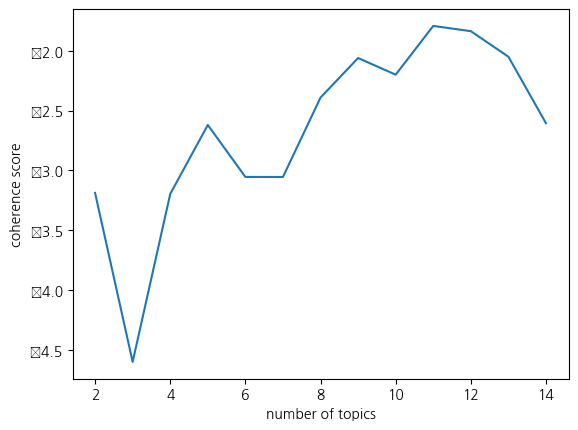

In [ ]:
x=range(2,15)   #시각화
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [ ]:
import pyLDAvis
import pyLDAvis.gensim

# LDA 모델을 pyLDAvis 객체에 전달
pyLDAvis.enable_notebook()
lda_viz = pyLDAvis.gensim.prepare(model, corpus, dictionary)
lda_viz

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.106520  0.028129       1        1  31.152552
9     -0.080271 -0.008343       2        1  14.702444
6     -0.069057  0.004647       3        1  12.512903
2      0.035066 -0.112398       4        1   8.302550
3     -0.001104 -0.058692       5        1   8.160437
0      0.006110  0.004020       6        1   6.694773
5      0.028657  0.061283       7        1   5.923621
8      0.053598  0.052787       8        1   4.701984
1      0.066205  0.008110       9        1   3.956994
4      0.067316  0.020458      10        1   3.891741, topic_info=      Term         Freq        Total Category  logprob  loglift
6       기술   572.000000   572.000000  Default  30.0000  30.0000
24      지능  1543.000000  1543.000000  Default  29.0000  29.0000
22    인공지능  1536.000000  1536.000000  Default  28.0000  28.0000
238   투자정보   160.000000   160.000000  Default  27.0000  27.0000
223  글로벌마켓   167.000000   167.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
437     생성    11.750685   437.546428  Topic10  -5.5805  -0.3710
6       기술    11.011779   572.172682  Topic10  -5.6455  -0.7042
237     최대     9.583875   238.506929  Topic10  -5.7844   0.0320
852     예상     9.130205   125.871866  Topic10  -5.8329   0.6226
9       미국     9.622871   503.551187  Topic10  -5.7803  -0.7112

[746 rows x 6 columns], token_table=       Topic      Freq Term
term                       
30         1  0.289108   10
30         2  0.109861   10
30         3  0.213940   10
30         4  0.132990   10
30         5  0.080950   10
...      ...       ...  ...
4171       9  0.037507   효과
2615       1  0.113218   효율
2615       6  0.792523   효율
2615      10  0.037739   효율
10498      6  0.852402   후기

[1961 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 10, 7, 3, 4, 1, 6, 9, 2, 5])

###**-------------------**

#6.결과정리 및 분석

In [ ]:
#문장의 결과(토픽별 설명정도)에 대한 설명정도(%)
ldamodel.get_document_topics(corpus)[1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(1, 0.98161036)]

In [ ]:
ldamodel.get_document_topics(corpus)[10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(1, 0.97741634)]

In [ ]:
ldamodel.get_document_topics(corpus)[100]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(5, 0.6150883), (7, 0.18027337), (9, 0.17861062)]

In [ ]:
#연관어 분석

from gensim.models.word2vec import Word2Vec
model=Word2Vec(df2, sg=1, window=10, min_count=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model.init_sims(replace=True)
model.wv.most_similar("인공",topn=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-55-f1bf5154013d>:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)
/usr/local/lib/python3.10/dist-packages/gensim/models/word2vec.py:913: DeprecationWarning: Call to deprecated `init_sims` (Use fill_norms() instead. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  self.wv.init_sims(replace=repla

[('화두', 0.8744146823883057),
 ('생성', 0.8702852725982666),
 ('텔레콤', 0.868516206741333),
 ('대변', 0.8672243356704712),
 ('등장', 0.8666516542434692),
 ('촉발', 0.8617794513702393),
 ('확장', 0.8609176278114319),
 ('한국형', 0.8596787452697754),
 ('필두', 0.8589614629745483),
 ('단계', 0.8571133613586426)]

In [ ]:
model.init_sims(replace=True)
model.wv.most_similar("지능",topn=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-56-2655cb55e0ed>:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)
/usr/local/lib/python3.10/dist-packages/gensim/models/word2vec.py:913: DeprecationWarning: Call to deprecated `init_sims` (Use fill_norms() instead. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  self.wv.init_sims(replace=repla

[('생성', 0.9066224694252014),
 ('시작', 0.8806938529014587),
 ('대변', 0.8774843215942383),
 ('성형', 0.8764570355415344),
 ('아이폰', 0.8715723752975464),
 ('촉발', 0.8714907169342041),
 ('돌풍', 0.8698893189430237),
 ('주역', 0.8697875142097473),
 ('세계적', 0.8661726117134094),
 ('대화형', 0.8652691841125488)]

In [ ]:
model.wv.similarity("사람", "인간")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.91584545

In [ ]:
model.wv.similarity("인공", "인간")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.6537247

형태소 분석기를 okt, 꼬꼬마 둘 다 사용을 해보았고 불용어 처리 시에는 한국어 불용어 처리 모음집이 있는 파일을 사용 해보았습니다. 나름 나쁘지 않았지만 데이터가 많아 시간이 오래 걸렸습니다.

이렇게 전처리 후 LdaModel모델을 만들어서 데이터를 돌려 보았지만 원하는 성능이 안나와 혼란도를 분석 하여 num_topic 값이 10일 때 좋은 성능을 보이는 것을 확인 했습니다.(일관성이 좋음) 그래서 모델을 10으로 다시 수정 후 데이터를 돌렸습니다.
확실히 더 일관성이 높게 잘 나왔습니다.

###**----------------------**

한 학기동안 배우면서 새로운 기술을 활용 해보았던게 제일 기억에 남습니다. 그리고 제가 하고있는 프로젝트에 많은 부분을 적용할 수 있는 수업이었습니다. 감사합니다. 앞으로도 좋은 강의 해주시면 좋겠습니다.

아쉬운 점은 시간대가 조금 아쉽긴하지만 이 부분은 어쩔 수 없을 것이라고 생각이 듭니다. 그리고 토픽 모델링 뿐 만이 아니라 더 진도가 나갔으면 좋았을 것이라고 생각이 듭니다! 이 수업은 비이공계 학생들이 우선인 것을 잘 알고 있습니다. 하지만 각 학생들의 수준과 능력을 파악이 된다면 교수님께서 쉬운부분은 넘어가고 어려운부분 그리고 꼭 알려주고 싶은 부분을 해주신다면 더 좋을 것 같습니다. 수업은 엄청 좋았습니다! 항상 감사하고 몸 건강히 하시면서 강의 해주셨으면 좋겠습니다!

한 학기동안 고생 많으셨습니다.

# **여러분 한 학기 동안 고생 많았습니다. 굿럭!!**